In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [43]:
# Load your data
pre_test = pd.read_excel('ProgrammingingeophysicsPre.xlsx')
post_test = pd.read_excel('ProgrammingingeophysicsPost.xlsx')
descriptive_stats_pre = pre_test.describe()
descriptive_stats_post = post_test.describe()

In [53]:
descriptive_stats_pre_cleaned=descriptive_stats_pre[descriptive_stats_pre.columns[2:]]
descriptive_stats_post_cleaned=descriptive_stats_post[descriptive_stats_pre.columns[2:]]
reflective_stats_post_cleaned=descriptive_stats_post[descriptive_stats_post.columns[12:]]

In [57]:
descriptive_stats_post_cleaned

,I like programming.,Programming is interesting.,I would like to continue learning programming in the future.,I would like more programming teaching in the next year.,I find programming easy.,Programming concepts and syntax are easy for me to learn.,I am confident that I could learn a new programming skill.,Programming makes me feel more like a geophysicist.,Collaborating in coding activities makes me feel more like a geophysicist.,I believe that programming skills will be beneficial for my future career.
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.900000,4.700000,4.600000,4.400000,2.500000,2.600000,4.800000,4.500000,4.400000,4.900000
std,0.737865,0.483046,0.516398,0.699206,0.849837,0.966092,0.421637,0.707107,0.699206,0.316228
min,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000
25%,4.000000,4.250000,4.000000,4.000000,2.000000,2.250000,5.000000,4.000000,4.000000,5.000000
50%,4.000000,5.000000,5.000000,4.500000,2.500000,3.000000,5.000000,5.000000,4.500000,5.000000
75%,4.000000,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfbadf4f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfbae00490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfbadf4c70>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdfbae008b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfbae00b50>,
 'means': []}

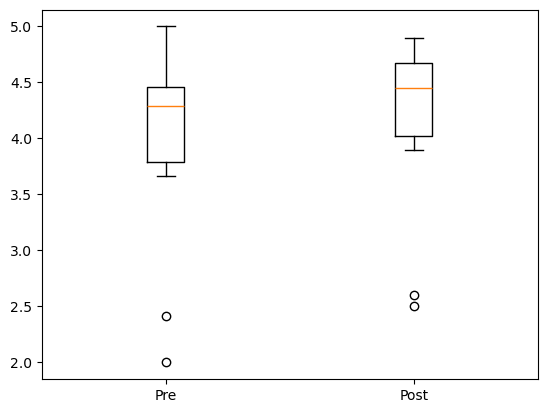

In [58]:
plt.figure()
plt.boxplot([descriptive_stats_pre_cleaned.loc['mean'], descriptive_stats_post_cleaned.loc['mean']], labels=['Pre', 'Post'])

In [ ]:
# Ensure each student has a unique identifier and merge datasets
data = pd.merge(pre_test, post_test, on='student_id', suffixes=('_pre', '_post'))

data

# Calculate descriptive statistics
descriptive_stats = data.describe()

# Perform paired t-test for each construct
results = {}
constructs = ['confidence', 'understanding', 'skills']
for construct in constructs:
    pre_scores = data[f'{construct}_pre']
    post_scores = data[f'{construct}_post']
    t_stat, p_val = stats.ttest_rel(pre_scores, post_scores)
    effect_size = (post_scores.mean() - pre_scores.mean()) / pre_scores.std()
    results[construct] = {'t_stat': t_stat, 'p_val': p_val, 'effect_size': effect_size}

# Visualization
for construct in constructs:
    plt.figure()
    plt.boxplot([data[f'{construct}_pre'], data[f'{construct}_post']], labels=['Pre', 'Post'])
    plt.title(f'{construct.capitalize()} Pre- and Post-Test Scores')
    plt.ylabel('Scores')
    plt.show()

# Display results
results_df = pd.DataFrame(results).T
import ace_tools as tools; tools.display_dataframe_to_user(name="Statistical Analysis Results", dataframe=results_df)
